# Practical 7: DIPA
# Devasy Patel
# 20BCE057


## Aim: Implement the following
- Median Filter
- Max Filter
- Min Filter
- Mean Filter
- Harmonic Mean Filter
- Contraharmonic Mean Filter


In [1]:
# load image as grayscale
import cv2
img = cv2.imread('images_woods\\fig5.08(b).jpg',0)

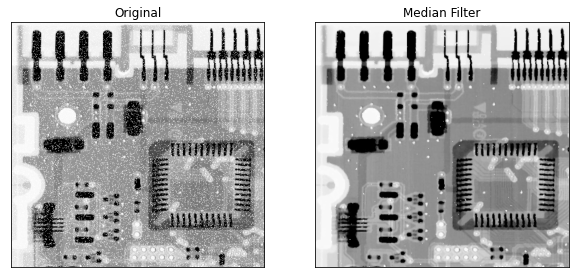

In [3]:
# apply median filter
from matplotlib import pyplot as plt
img_median = cv2.medianBlur(img,3)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median,cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()